In [65]:
import pandas as pd 
import numpy as np
import re
import whois
import requests
import json
import sys
import urllib.request
from bs4 import BeautifulSoup
import seaborn as sns
import tldextract
import time
from joblib import dump
import datetime
import seolib

sns.set(style="whitegrid")
#Phishing : 1
#Legit : 0
#Suspicious : 2

def alive(url):
    try:
        check = urllib.request.urlopen(url).getcode()
        if check == 200:
            return 1
        else:
            return 0
    except:
        return 0

def url_length(url):
    if len(url) >= 54 :
        return 2
    else:
        return 0

def redirect(url):
    if "//" in str(url[7:]):
        return 1
    else: 
        return 0 

def symbol(url):
    if "@" in url:
        return 1
    else:
        return 0 

def ip_in_url(url):
    match=re.search('(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  #IPv4
                        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)'  #IPv4 in hexadecimal
                        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}',url)
    if match:   
        return 1
    else:
        return 0


def sub_domain(url):
    if url.count(".") >=3:
        return 2
    else:
        return 0

def puny(url):
    import idna
    try:
        url = ' '.join(repr(x).lstrip('u')[1:-1] for x in url)
        domain = url.split("/")
        if "xn--" in str(idna.encode(name[2])):
            return 1
    except:
        return 0

def protocol_in_domain(url):
    if "https" in url or "http" in url:
        return 1
    else:
        return 0

def http_notsafe(url):
    protocol = url.split("/")
    if protocol[0] == 'http:':
        return 2
    else:
        return 0
def shorten(url):
    match=re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|tr\.im|link\.zip\.net',url)
    if match:
        return 2 
    else:
        return 0

def age_of_domain(url):
        dns = 0
        try:
            domain_name = whois.whois(urlparse(url).netloc)
        except Exception as e:
            print("Cant access: {}!! error happen: {}".format(url, e))
            dns = 1
        
        if dns == 1:
            return 1
        else:
            creation_date = domain_name.creation_date
            expiration_date = domain_name.expiration_date
            if (isinstance(creation_date,str) or isinstance(expiration_date,str)):
                try:
                    creation_date = datetime.strptime(creation_date,'%Y-%m-%d')
                    expiration_date = datetime.strptime(expiration_date,"%Y-%m-%d")
                except:
                    return 2
            if ((expiration_date is None) or (creation_date is None)):
                return 1
            elif ((type(expiration_date) is list) or (type(creation_date) is list)):
                return 2
            else:
                ageofdomain = abs((expiration_date - creation_date).days)
                if ((ageofdomain/30) < 6):
                    return 1
                else:
                    return 0
def web_traffic(url):
        try:
            alexa_rank = seolib.get_alexa('http://google.com')
        except TypeError as e:
            print("Error: ", e)
            return 1
        except HTTPError as e:
            print("Error: ", e)
            return 2
        rank= int(rank)
        if (rank<100000):
            return 0
        else:
            return 2


ModuleNotFoundError: No module named 'api'

In [45]:
df = pd.read_csv("dataset/file.csv")
data = pd.read_csv("dataset/data.csv")
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,2,0,0,0,0,0,0,1,2,0,0
1,2,2,0,0,0,2,0,1,0,0,0
2,2,0,0,0,0,0,0,1,0,0,0
3,2,0,0,0,0,0,0,1,2,0,0
4,2,0,0,0,0,0,0,1,2,2,0


In [46]:
col_new = ["class", "url_length","redirect","symbol","ip_in_url","sub_domain","puny", "protocol_in_domain", "http_notsafe","shorten","age_of_domain"]

In [47]:
df.columns = col_new
for col in col_new:
    print("{} value: ".format(col))
    print(df[col].value_counts())

class value: 
0    30000
1    21341
2    10197
Name: class, dtype: int64
url_length value: 
0    42758
2    18780
Name: url_length, dtype: int64
redirect value: 
0    61332
1      206
Name: redirect, dtype: int64
symbol value: 
0    60600
1      938
Name: symbol, dtype: int64
ip_in_url value: 
0    60139
1     1399
Name: ip_in_url, dtype: int64
sub_domain value: 
0    49787
2    11751
Name: sub_domain, dtype: int64
puny value: 
0    61538
Name: puny, dtype: int64
protocol_in_domain value: 
1    31537
0    30001
Name: protocol_in_domain, dtype: int64
http_notsafe value: 
0    44656
2    16882
Name: http_notsafe, dtype: int64
shorten value: 
0    58323
2     3215
Name: shorten, dtype: int64
age_of_domain value: 
0    61538
Name: age_of_domain, dtype: int64


In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

drop_f = []
for col in col_new:
    if(np.unique(df[col].values).shape[0] == 1):
        drop_f.append(col)

In [49]:
df.drop(drop_f, axis = 1, inplace = True)
df.head()

,class,url_length,redirect,symbol,ip_in_url,sub_domain,protocol_in_domain,http_notsafe,shorten
0,2,0,0,0,0,0,1,2,0
1,2,2,0,0,0,2,1,0,0
2,2,0,0,0,0,0,1,0,0
3,2,0,0,0,0,0,1,2,0
4,2,0,0,0,0,0,1,2,2


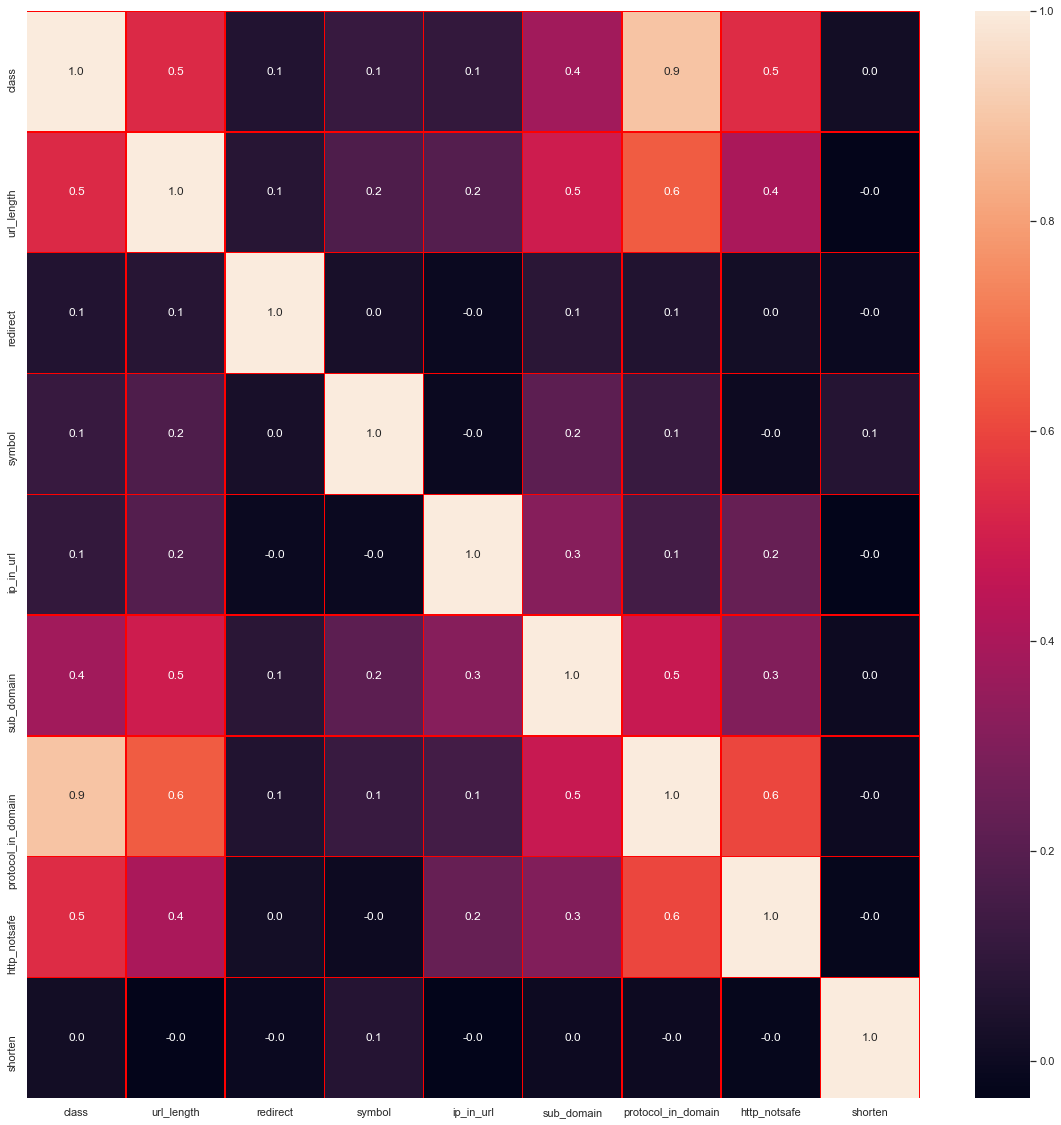

In [50]:
f_corr = df.corr()
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(f_corr, annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',ax=ax)
plt.show()

In [51]:
merge_f = ["redirect", "symbol", "ip_in_url"]
idx_ls = []
for idx, name in enumerate(merge_f):
#     f, ax = plt.subplots(3, 1, idx)
    print(df[["class", name]].groupby("class").mean())
    idx_ls.append(df.loc[df[name] != 0, name].index)


       redirect
class          
0      0.000000
1      0.005670
2      0.008336
         symbol
class          
0      0.000000
1      0.027225
2      0.035010
       ip_in_url
class           
0       0.000000
1       0.054168
2       0.023831


In [52]:
idx_ls = [k for ls in idx_ls for k in ls]
idx_ls = list(set(idx_ls))


In [53]:
df["Have_Slash_Symbol_IP"] = 0
df.iloc[idx_ls, -1] = 1
df[["class", "Have_Slash_Symbol_IP"]].groupby("class").mean()

,Have_Slash_Symbol_IP
class,
0,0.000000
1,0.086219
2,0.065804


In [54]:
df["Have_Slash_Symbol_IP"].value_counts()

0    59027
1     2511
Name: Have_Slash_Symbol_IP, dtype: int64

In [55]:
df.drop(merge_f, axis = 1, inplace = True)
df.head()

,class,url_length,sub_domain,protocol_in_domain,http_notsafe,shorten,Have_Slash_Symbol_IP
0,2,0,0,1,2,0,0
1,2,2,2,1,0,0,0
2,2,0,0,1,0,0,0
3,2,0,0,1,2,0,0
4,2,0,0,1,2,2,0


In [13]:

import requests
from lxml.html import fromstring
val_ls = []
error_con = []
for web in data.iloc[2, :].values[100:]:
    print("webname: " + web)
    try:
         r = requests.get(web)
    except:
        error_con.append(web)
        print("Error!!!")
        continue
    tree = fromstring(r.content)
    title = tree.findtext('.//title')
    print(title)
    val_ls.append(str(title))
    break

webname: https://farraginous-knocks.000webhostapp.com/www.PayPal.com/www.PayPal.com/OLB-juifh348hfoiruh438o7hoeihflkzsgd89/info/PayPal
Website sleeping | 000webhost


In [64]:

def digitcount(url):
    digit_num = sum([1 for c in url if c.isdigit()])
    if(digit_num <= 7):
        return 0
    else: 
        return 1
def suffixcount(url):
    ext = tldextract.extract(url)
    number = url.count(ext.suffix)
    if(number <= 3):
        return 0
    else: 
        return 1
def Prefix_Suffix(url):
        try:
            subDomain, domain, suffix = tldextract.extract(url)
            if(domain.count('-')):
                return 1
                
            else:
                return -1
                
        except Exception as e:
            print("err_Prefix_Suffix",e)
            return 0
            
# def URL_of_Anchor(url):
#         try:
#             t1 = time.time()
#             regex_str = "<a href=\".*?\""
#             html = requests.get(url,timeout=7).text
#             links_list = re.findall(regex_str,html)
#             count_internal = 0
#             for link in links_list:
#                 if url_is_internal(link,url):
#                     count_internal += 1
#             if len(links_list) == 0:
#                 return 1
            
#             else: 
#                 count_anchor = len(links_list) - count_internal
#                 rate = count_anchor / len(links_list)
#                 anchor_link_count = count_anchor
#                 if (rate < 0.31):
#                     return 1
#                 elif (0.31 <= rate <= 0.67):
#                     return 2
#                 else:
#                     return 0
#         except:
#             print("ERROR!")
#             return 0

In [61]:
digit_c = []
suffix_c = []
# url_anchor = []
prefix = []
# age = []
web_tr = []
num = np.zeros(data.shape[0])
for row in range(data.shape[0]):
    for col in range(1, data.shape[1]):
        link = data.iloc[row, col]
        if isinstance(link, str):
            digit_c.append(digitcount(link)) 
            suffix_c.append(suffixcount(link)) 
#             age.append(age_of_domain(link))
            web_tr.append(web_traffic(link))
            prefix.append(Prefix_Suffix(link))
            num[row] += 1 
num = list(map(int, num))
num[2] = num[1] + num[2]
num[1] = num[0]
num[0] = 0
for i in range(2,4):
    num[i] = num[i-1]+num[i]
num

Error:  'NoneType' object is not subscriptable
Error:  'NoneType' object is not subscriptable
Error:  'NoneType' object is not subscriptable
Error:  'NoneType' object is not subscriptable
Error:  'NoneType' object is not subscriptable
Error:  'NoneType' object is not subscriptable
Error:  'NoneType' object is not subscriptable
Error:  'NoneType' object is not subscriptable
Error:  'NoneType' object is not subscriptable
Error:  'NoneType' object is not subscriptable
Error:  'NoneType' object is not subscriptable
Error:  'NoneType' object is not subscriptable
Error:  'NoneType' object is not subscriptable
Error:  'NoneType' object is not subscriptable
Error:  'NoneType' object is not subscriptable
Error:  'NoneType' object is not subscriptable
Error:  'NoneType' object is not subscriptable
Error:  'NoneType' object is not subscriptable
Error:  'NoneType' object is not subscriptable
Error:  'NoneType' object is not subscriptable
Error:  'NoneType' object is not subscriptable
Error:  'None

NameError: name 'HTTPError' is not defined

In [63]:
# df["Suffix_count"] = suffix_c
# df["digit_count"] = digit_c
# df["prefix_suffix"] = prefix
# digit_means = []
# for i in range(3):
#     digit_means.append(df.loc[df["class"] == i, "digit_count"].mean())
len(web_tr)

859

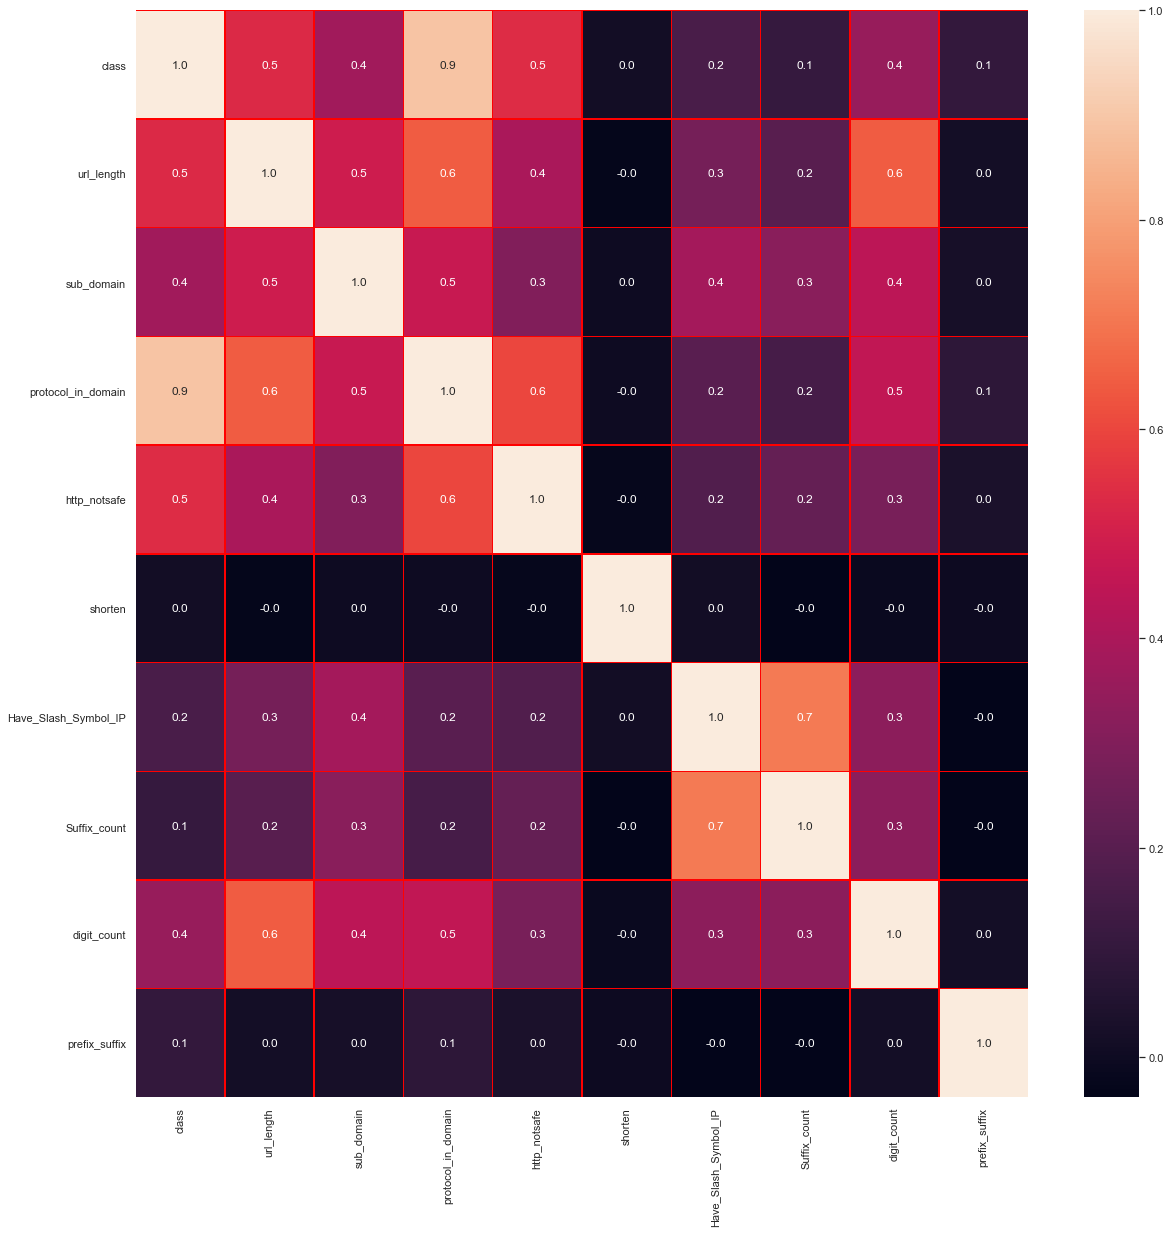

In [17]:
f_corr = df.corr()
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(f_corr, annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',ax=ax)
plt.show()

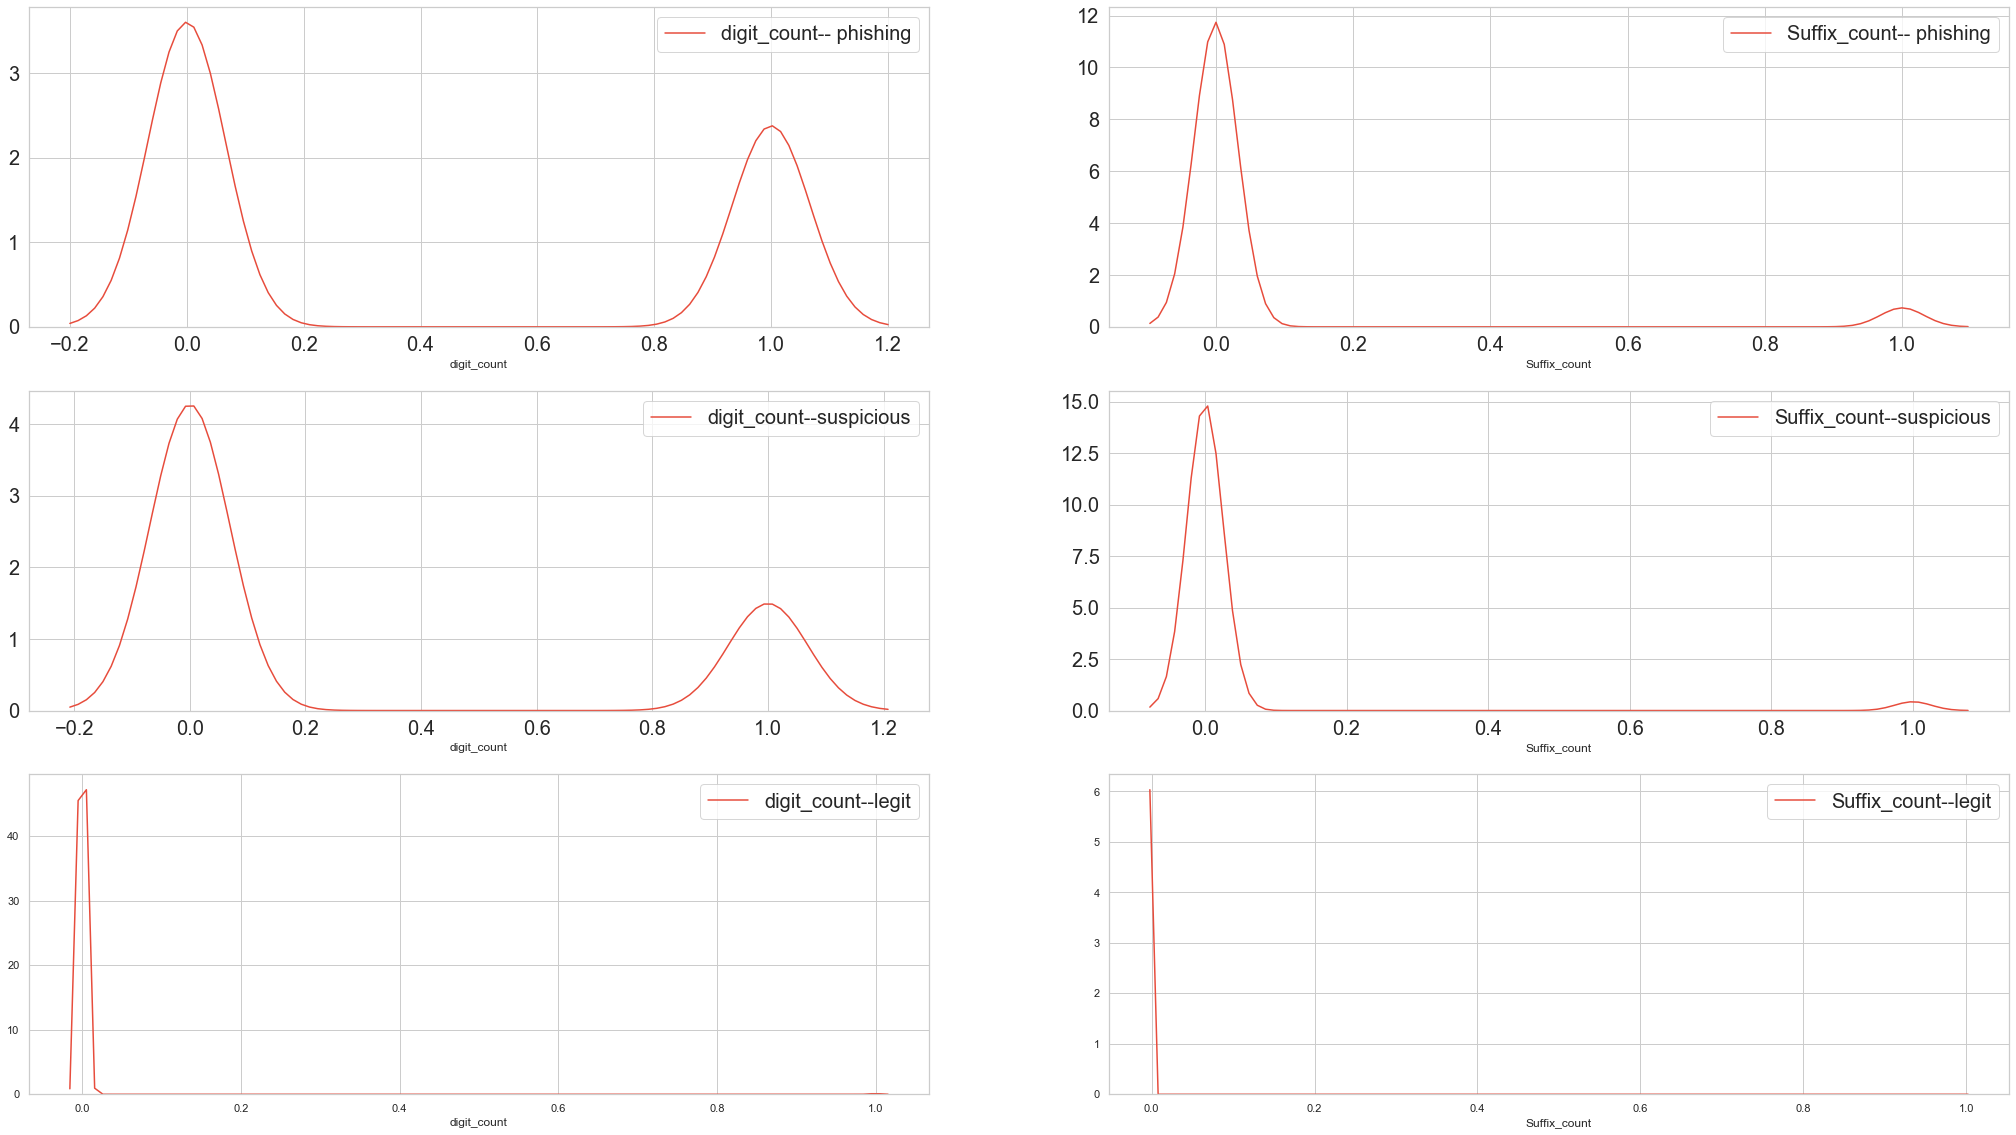

In [18]:
cont_features = ['digit_count', 'Suffix_count']
lb0 = df['class'] == 0
lb1 = df['class'] == 1
lb2 = df['class'] == 2


fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(20, 20))
plt.subplots_adjust(right=1.5)

for i, feature in enumerate(cont_features):    
    
    sns.distplot(df[lb1][feature], label= feature + "-- phishing", hist=False, color='#e74c3c', ax=axs[0][i])
    sns.distplot(df[lb2][feature], label= feature + "--suspicious", hist=False, color='#e74c3c', ax=axs[1][i])
    sns.distplot(df[lb0][feature], label= feature + "--legit", hist=False, color='#e74c3c', ax=axs[2][i])
    for j in range(2):        
        axs[i][j].tick_params(axis='x', labelsize=20)
        axs[i][j].tick_params(axis='y', labelsize=20)
    for k in range(3):
        axs[k][i].legend(loc='upper right', prop={'size': 20})
    
    

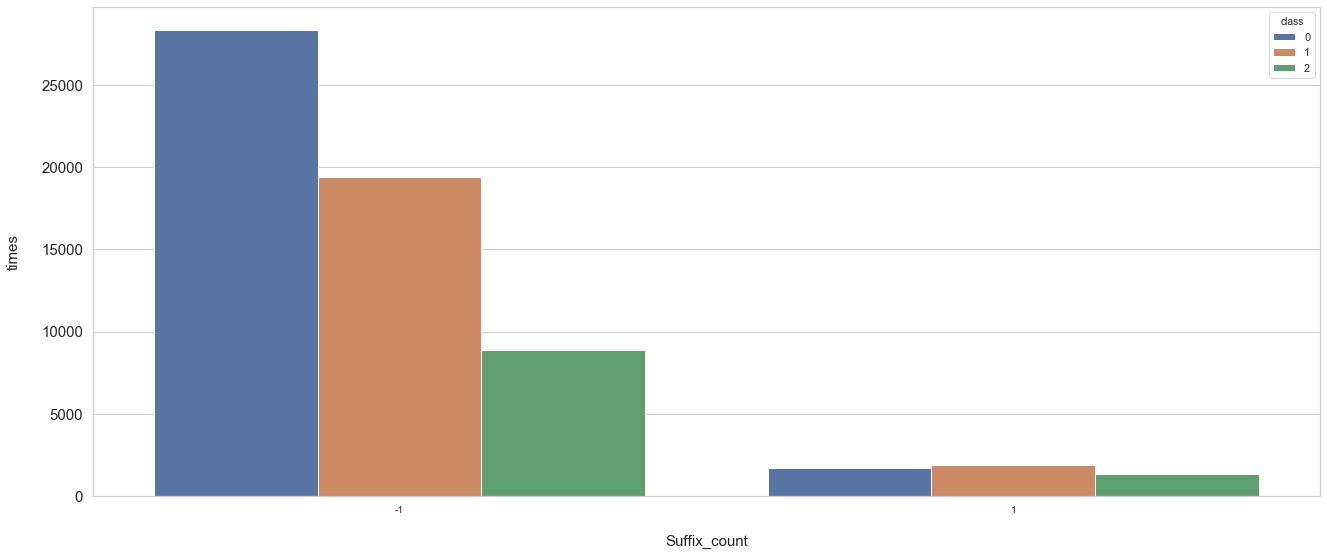

In [19]:
# df['Suffix_count'] = pd.qcut(df['Suffix_count'], 15, duplicates = "drop")
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='prefix_suffix', hue='class', data=df)

plt.xlabel('Suffix_count', size=15, labelpad=20)
plt.ylabel('times', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

In [25]:
# df["protocol_in_domain"] = df.loc[df["class"] == 0, "protocol_in_domain"] = 1
df.loc[df["class"] == 0, "protocol_in_domain"].value_counts()


1    30000
Name: protocol_in_domain, dtype: int64

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
x = df.drop("class", axis = 1)
y = df["class"]
index_ = np.arange(x.shape[0])
np.random.seed(0)
np.random.shuffle(index_)
x_ = x.iloc[index_, :].values
y_ = y.iloc[index_].values
X_train, X_test, y_train, y_test = train_test_split(x_, y_, test_size=0.3, random_state=26)


random_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [150, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
model = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 19.3min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [27]:
def evaluate(model, x_test, y_test, threshold = 0.5):
    y_pred = model.predict(x_test)
    y_pred = model.predict_proba(X_test)
    y_pred = (y_pred > threshold).astype("uint8")
    y_pred = np.argmax(y_pred, axis = 1)
    return accuracy_score(y_test, y_pred), f1_score(y_test, y_pred, average = "weighted")

best_params = rf_random.best_params_
tune_model = rf_random.best_estimator_
tune_accuracy, tune_f1 = evaluate(tune_model, X_test, y_test)
print("model accuracy: {}".format(tune_accuracy))
print("model f1_score: {}".format(tune_f1))

model accuracy: 0.7903260751814538
model f1_score: 0.732473752378946


In [28]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 5, 6],
    'min_samples_split': [3, 5, 7],
    'n_estimators': [100, 200, 300,500, 1000]
}
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 4)
# model.fit(X_train, y_train)
# threshold = [0.4, 0.5, 0.6, 0.7]
# for i in range(4):
#     y_pred = model.predict_proba(X_test)
#     y_pred = (y_pred > threshold[i]).astype("uint8")
#     y_predict = np.argmax(y_pred, axis = 1)
#     print(accuracy_score(y_test, y_predict))
#     print(f1_score(y_test, y_predict, average = "weighted"))
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 597 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 866 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed: 22.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [29]:
grid_search.best_params_
grid_model = grid_search.best_estimator_
grid_accuracy, grid_f1 = evaluate(grid_model, X_test, y_test)
print("model accuracy: {}".format(grid_accuracy))
print("model f1_score: {}".format(grid_f1))

model accuracy: 0.7905969017441231
model f1_score: 0.7325014265402413


indices of columns : [0 3 1 7 5 8 6 4 2]


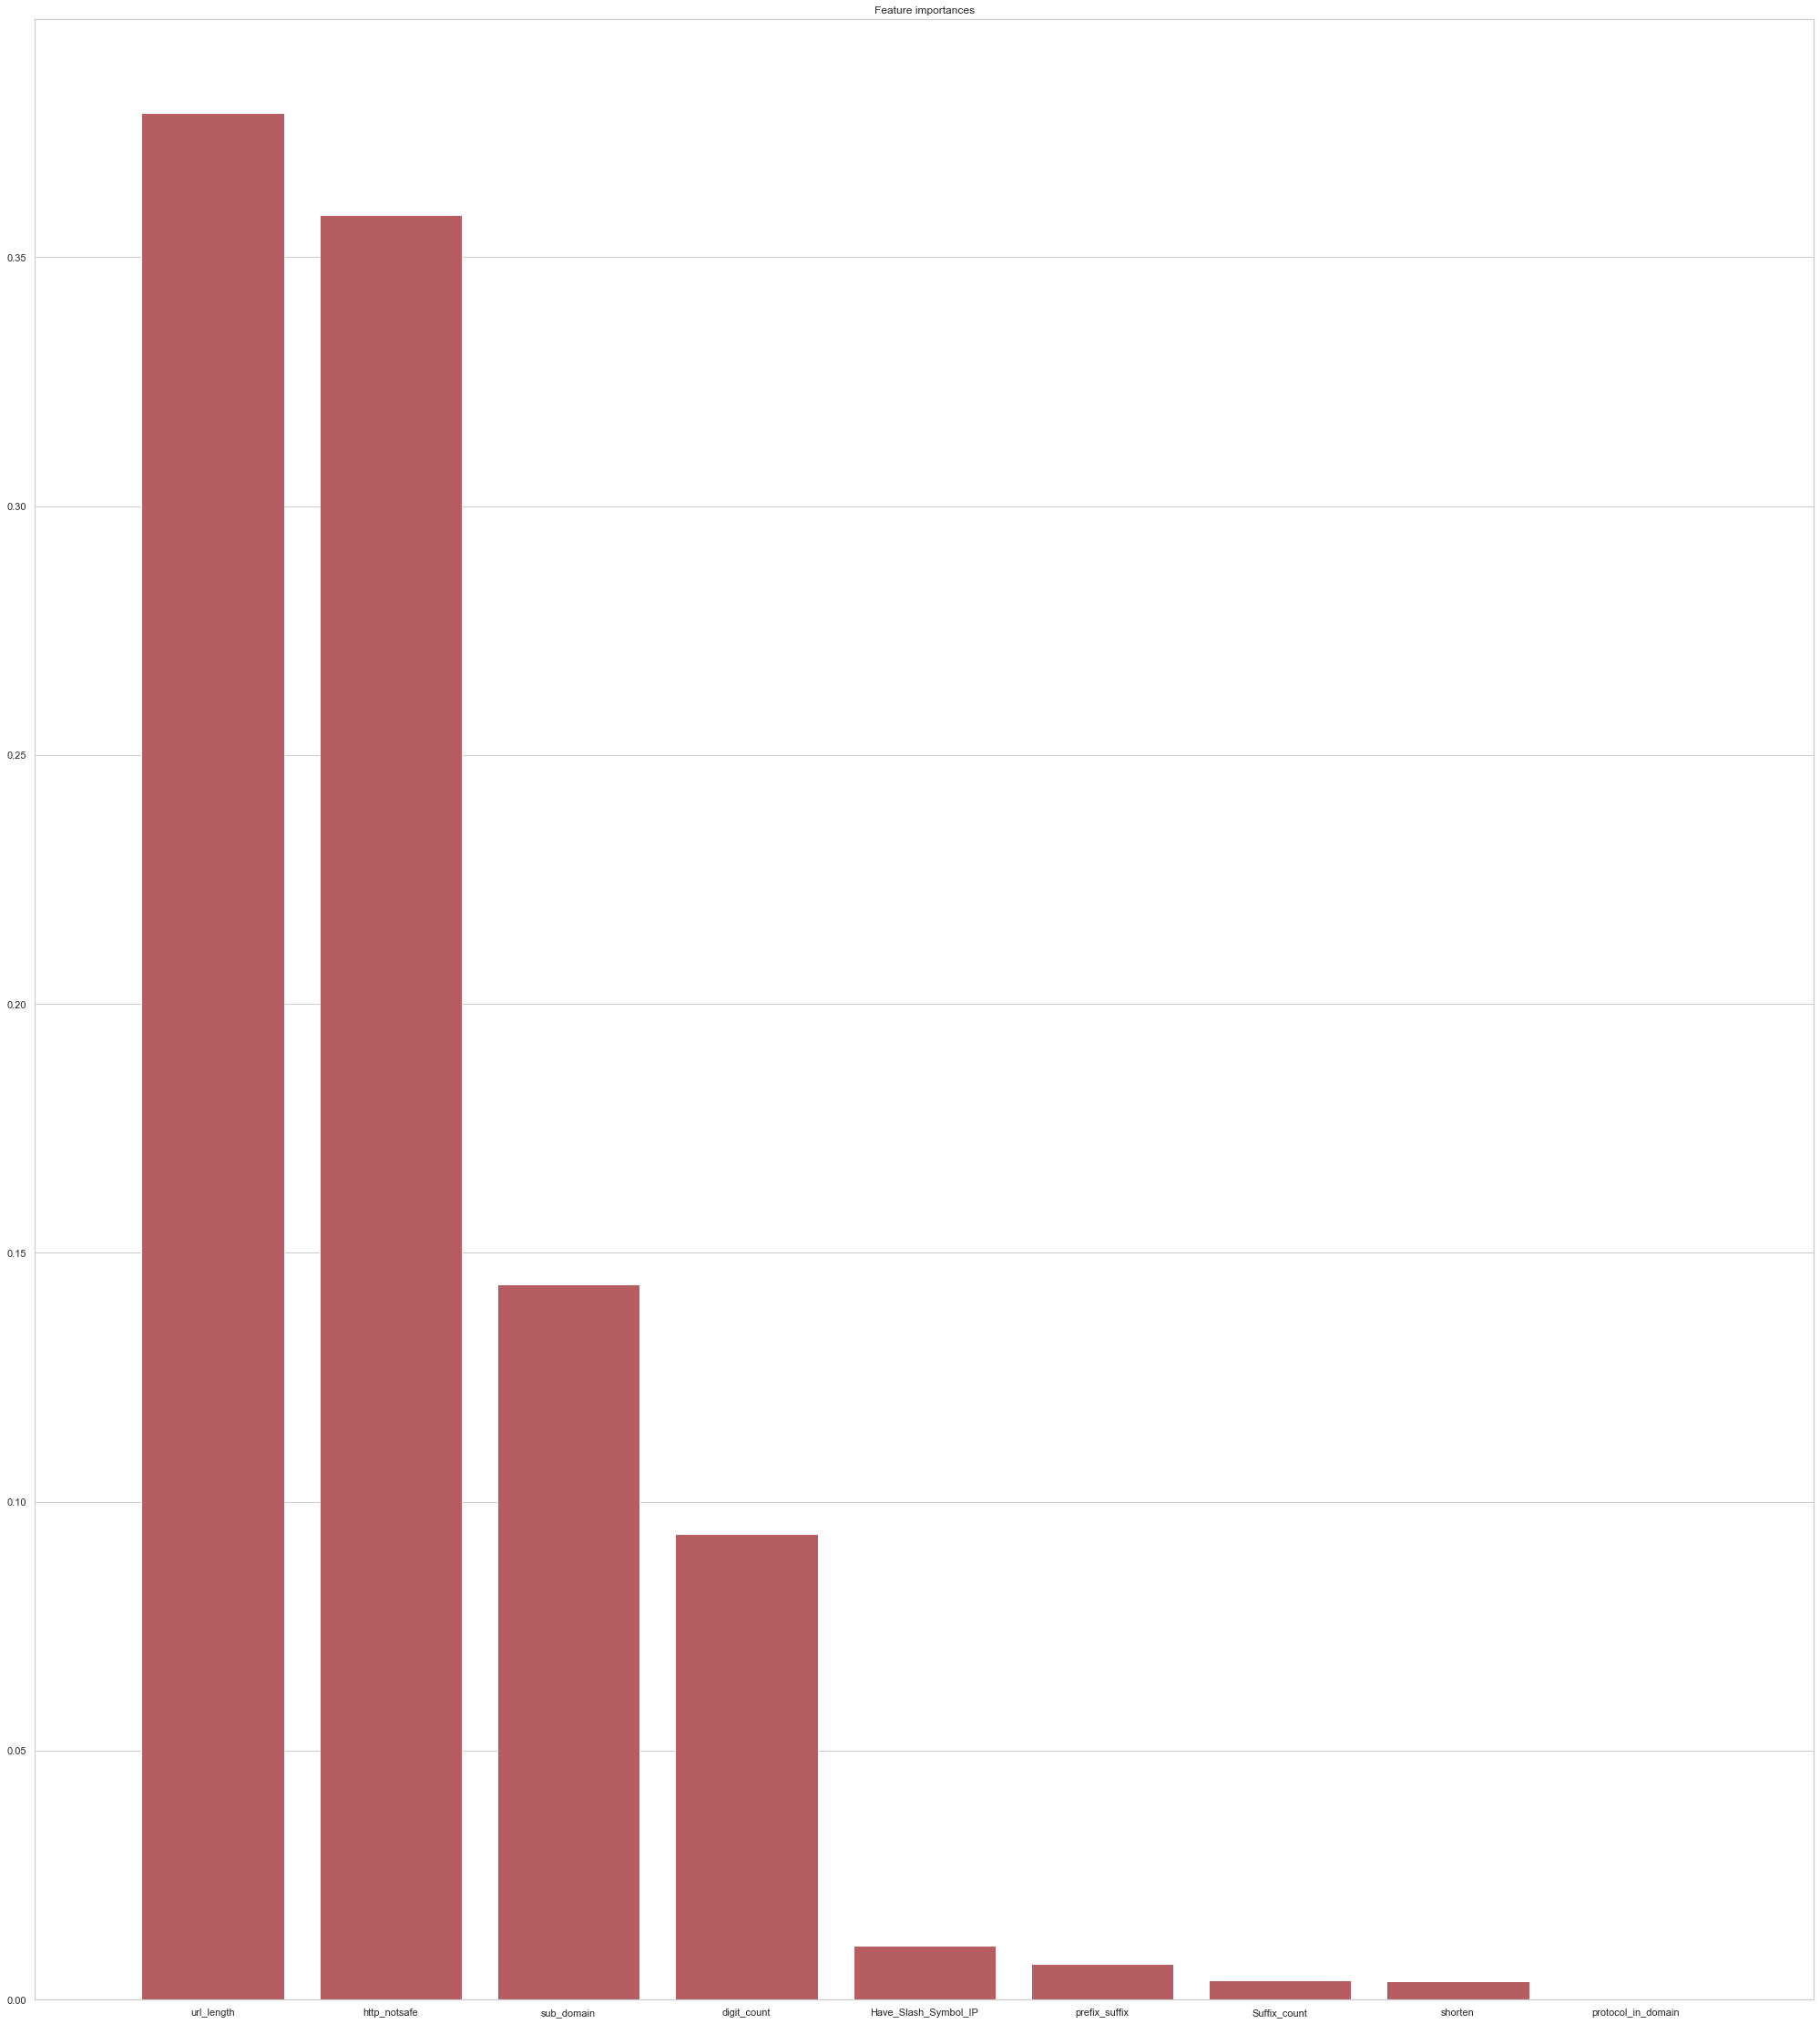

In [31]:
importances = tune_model.feature_importances_
indices = np.argsort(importances)[::-1] 
print(f"indices of columns : {indices}")

# Plot the feature importances of the forest


plt.title("Feature importances")
sns.barplot(np.arange(X_train.shape[1]), importances[indices],
       color="r")   
plt.xticks(np.arange(X_train.shape[1]), df.drop("class", axis = 1).columns[indices])
plt.xlim([-1, X_train.shape[1]])
plt.rcParams['figure.figsize'] = (35,40)  
plt.show()

In [120]:
len(suffix_c)

61542

In [18]:
df

,class,url_length,sub_domain,protocol_in_domain,http_notsafe,shorten,Have_Slash_Symbol_IP
0,2,0,0,1,2,0,0
1,2,2,2,1,0,0,0
2,2,0,0,1,0,0,0
3,2,0,0,1,2,0,0
4,2,0,0,1,2,2,0
...,...,...,...,...,...,...,...
61533,0,0,0,0,0,0,0
61534,0,0,0,0,0,0,0
61535,0,0,0,0,0,0,0
61536,0,0,0,0,0,0,0


In [54]:
k = df.loc[df["class"] == 0, "Suffix_count"].loc[df["Suffix_count"] == 3].index
k

Int64Index([39590, 41310, 43133, 49466, 54199, 60975, 61510], dtype='int64')

In [48]:
website = []
for i in range(4):
    website.append(data.iloc[i, 1:])

In [50]:
website = [i for k in website for i in k if isinstance(i, str)]

In [52]:
website = pd.Series(website)

In [60]:
df

,class,url_length,sub_domain,protocol_in_domain,http_notsafe,shorten,Have_Slash_Symbol_IP,Suffix_count,digit_count,prefix_suffix
0,2,0,0,1,2,0,0,0,0,-1
1,2,2,2,1,0,0,0,0,1,1
2,2,0,0,1,0,0,0,0,0,1
3,2,0,0,1,2,0,0,0,0,-1
4,2,0,0,1,2,2,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...
61533,0,0,0,0,0,0,0,0,0,-1
61534,0,0,0,0,0,0,0,0,0,-1
61535,0,0,0,0,0,0,0,0,0,-1
61536,0,0,0,0,0,0,0,0,0,-1


In [63]:
tune_model.predict([[ 2,0 , 1 , 0,  0 , 0,  0,  0, -1]])

array([1], dtype=int64)

In [65]:
df.loc[df["class"] == 0, "protocol_in_domain"].value_counts()

0    30000
Name: protocol_in_domain, dtype: int64

In [41]:
test = RandomForestClassifier(max_features = 3,min_samples_leaf= 5,min_samples_split = 5,n_estimators= 100)
test.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [42]:
y__ = test.predict(X_test)
accuracy_score(y_test, y__)

0.793196836745748

In [43]:
dump(test, 'rf_model.joblib')

['rf_model.joblib']

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,29990,29991,29992,29993,29994,29995,29996,29997,29998,29999
0,suspicious,http://zarmuzik.com/JdSRox/lDDC.html,https://www.golf-fine.com/a/sc0/identify.php?i...,https://vzyat-zaym.ru,http://manjumagickitchen.com/proposal,http://betasustiklayingir.blogspot.com,http://advocate4mychild.com/wp-includes/Simple...,http://techsuiop.com,http://dispositivo-token.ddns.net:2019/Valide,http://www.calloway-assoc.com/06792643/sc0/ide...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,likely phishing,https://www.iats.com.br/eng/download/chase/cha...,https://orecon.co.jp/xmlrc-re/American-Express...,http://donime.tk/mail1.php?%250%25=%2013InboxL...,http://dispositivo-token.ddns.net:2019/Valide/...,http://wzlzsopole.pl.projekt2019.pl/home/myacc...,http://techsuiop.com/,https://www.parkstmgcasbc.cf/access/Excel.html...,https://orecon.co.jp/xmlrc-re/American-Express...,https://mytanfarma.com/wp-includes/SimplePie/D...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,totally phishing,https://storage.googleapis.com/aoffice365-marq...,https://odkazinpost.net/x6Dvvu7V/pdZ9ikK6-ipko...,http://wzlzsopole.pl.projekt2019.pl/home/myacc...,http://wzlzsopole.pl.projekt2019.pl/home/myacc...,http://www.zeshiyang.com/boa/boa/boa/mobileind...,http://www.zeshiyang.com/boa/boa/boa/mainindex...,http://www.roithai.com/picture/image/session/P...,https://776531.com/phplive/phplive.php,http://cafecitoperez.ivanidzakovic.com/admin/a...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,legit,https://youtube.com,https://facebook.com,https://baidu.com,https://wikipedia.org,https://yahoo.com,https://google.co.in,https://reddit.com,https://qq.com,https://amazon.com,...,https://benjaminstrahs.com,https://splashtop.com,https://jjshouse.com,https://hdmovie16.ws,https://motorcycle-superstore.com,https://yifymovies.me,https://eazel.com,https://straightline.jp,https://aiu.edu,https://123netflix.com


In [68]:
with open("dataset/whitelist.txt", "w") as f:
    for url in data.iloc[3, 1:]:
        domain = url.split("//")[-1].split("/")[0]
        f.write(domain + "\n")

In [72]:
def check_whitelist(url):
    domain = url.split("//")[-1].split("/")[0]
    with open("dataset/whitelist.txt", "rt") as f:
        for line in f:
            if(line.rstrip() in domain):
                return 0
    return 1

In [73]:
check_whitelist("https://www.baca-bank.vn/SitePages/trang-chu.aspx")

0